<a href="https://colab.research.google.com/github/2100030074/prodigyinfotech_ml/blob/main/prodiogy_ml_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1460, 81) (1459, 80) (2919, 81)


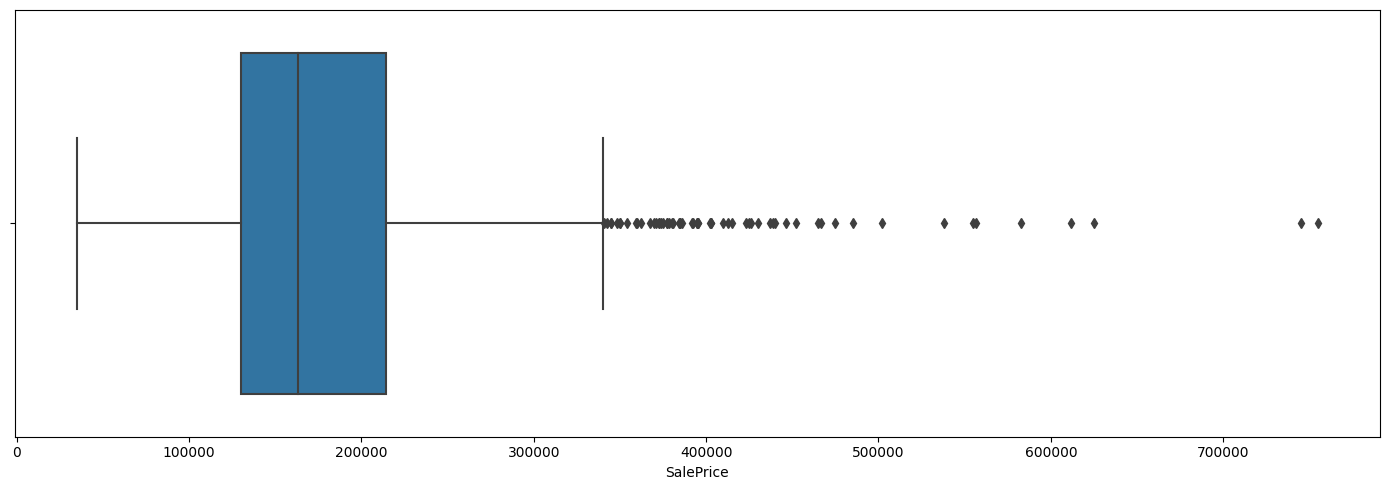

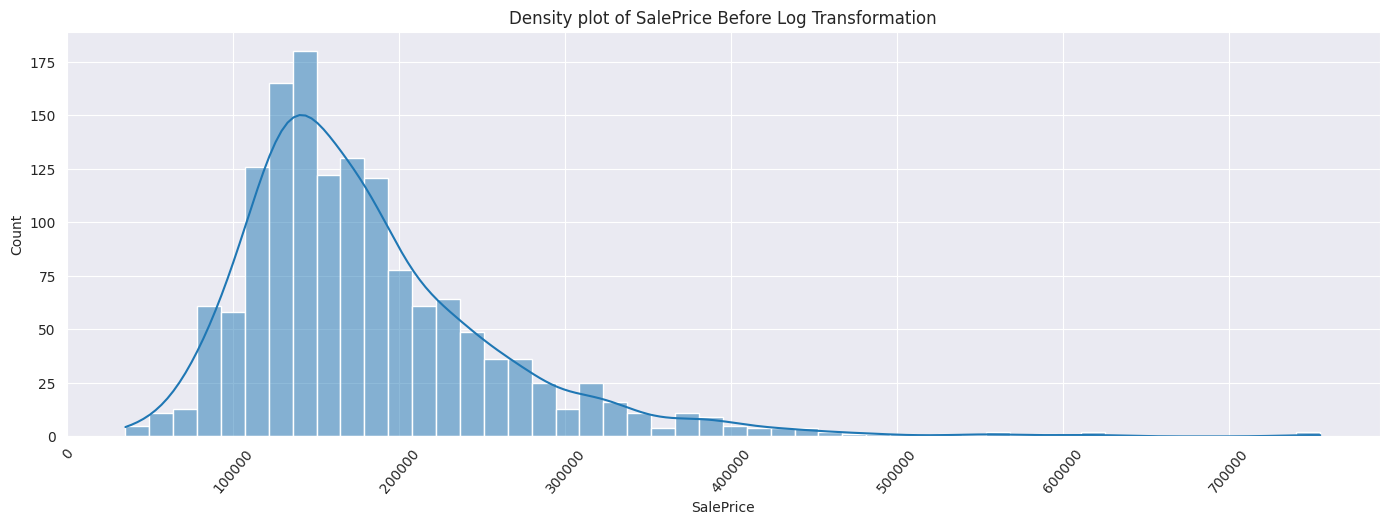

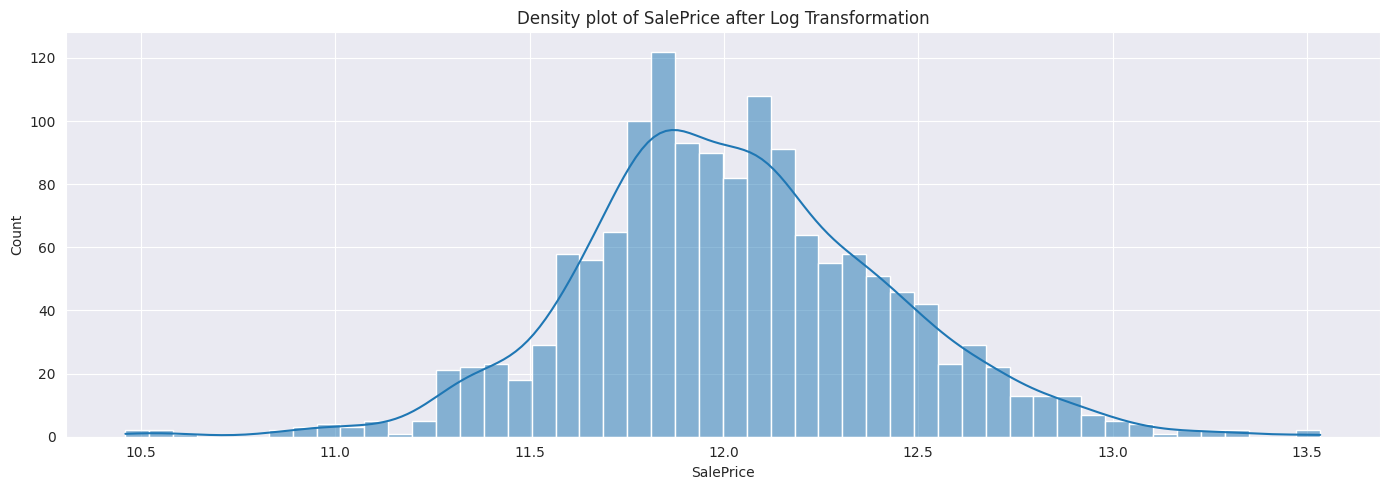

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


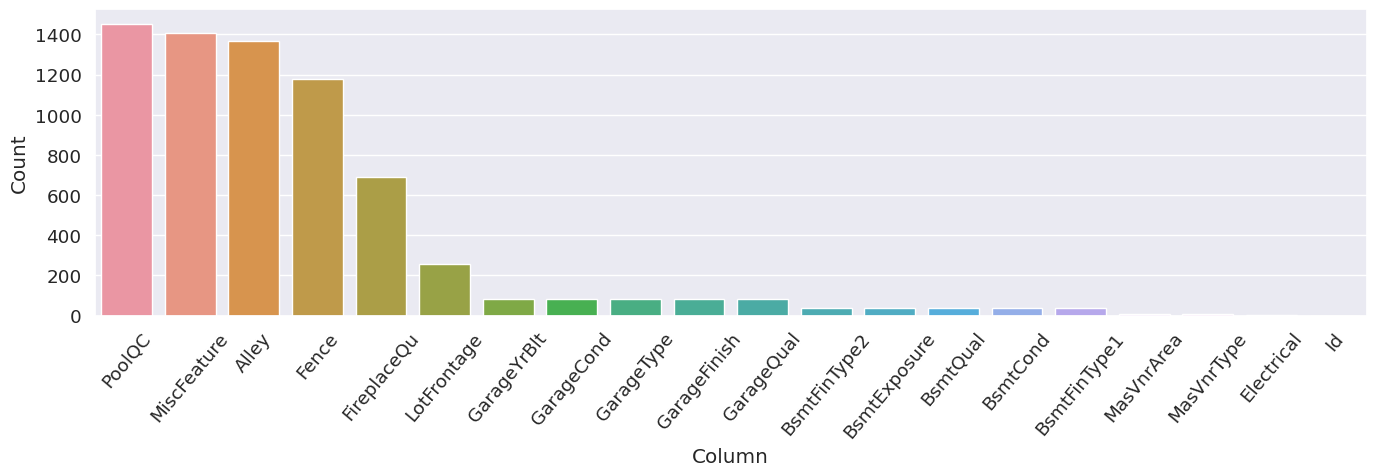

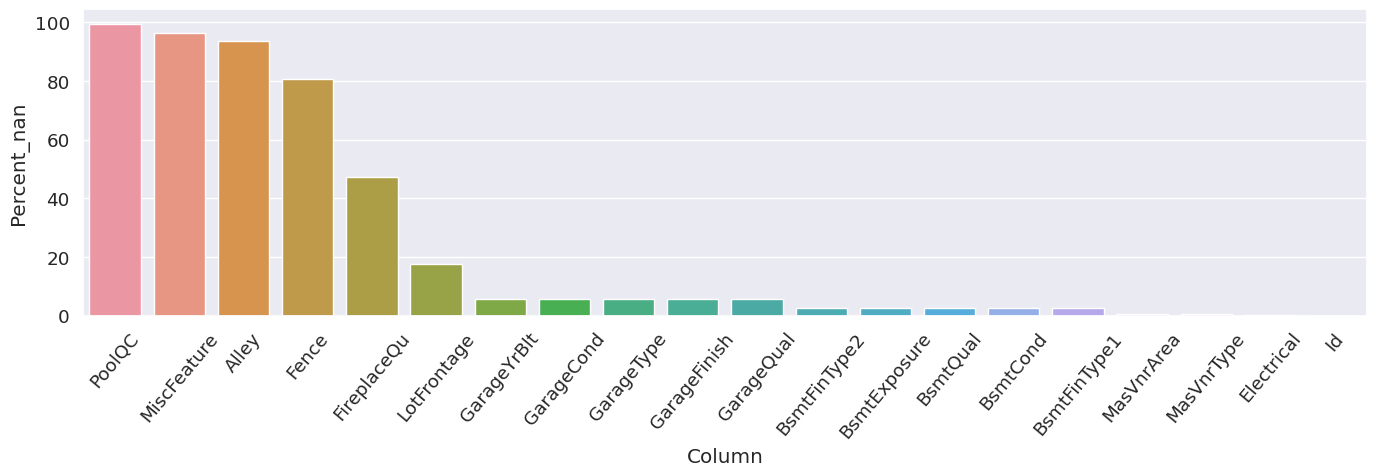

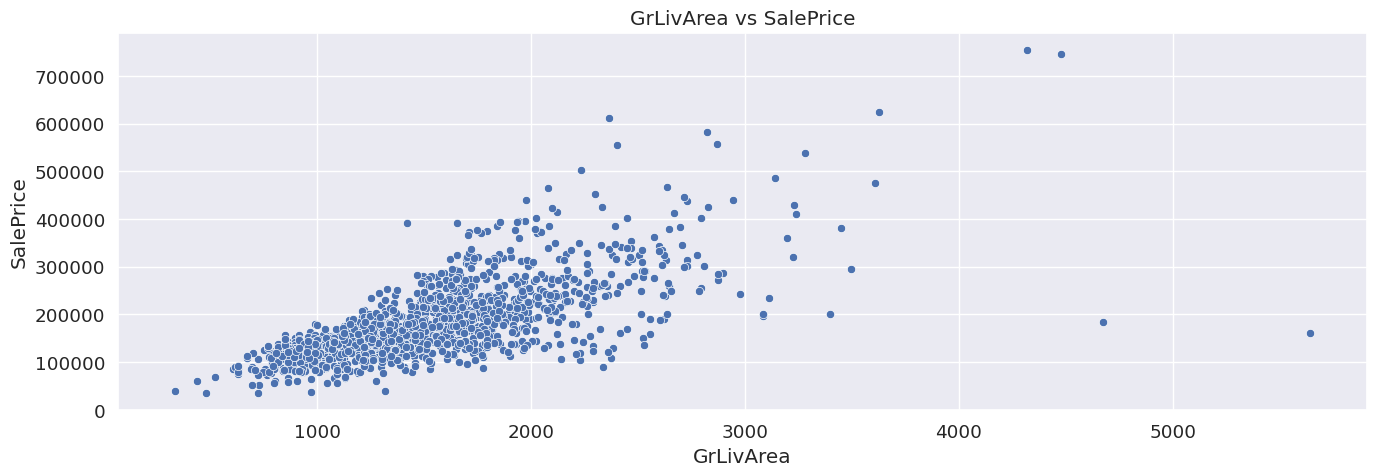

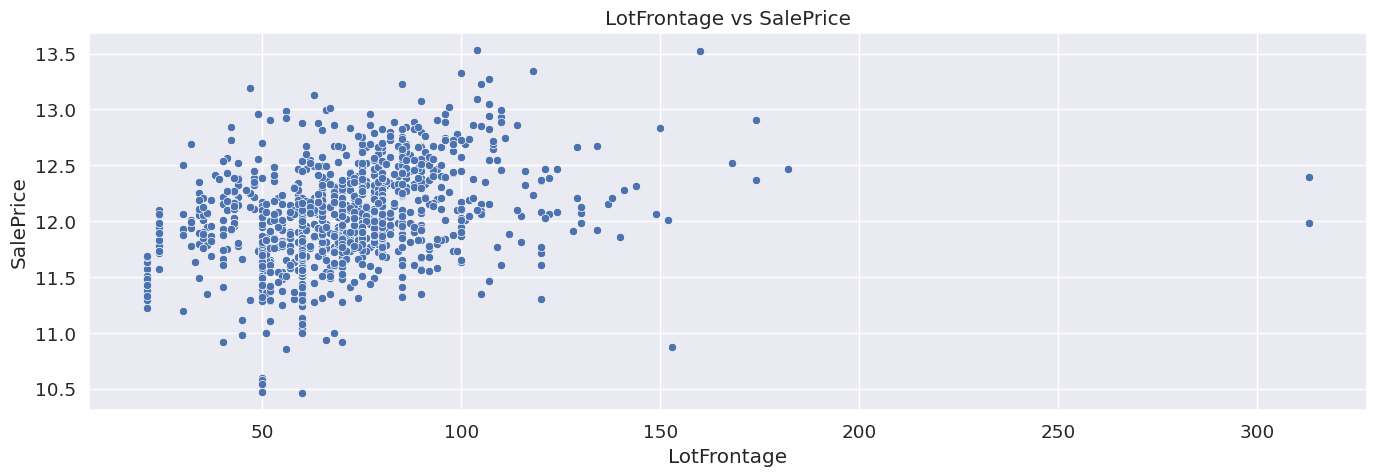


Highly skewed features: 

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
True


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


MSE for Linear Regression is : 0.00857
RMSE for Linear Regression is : 0.1601


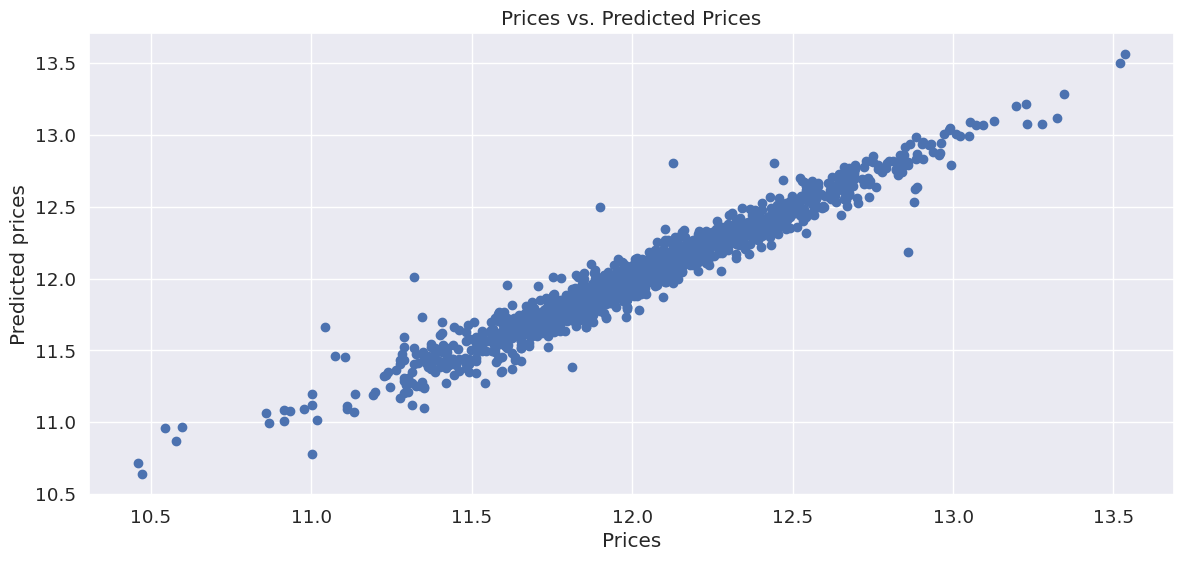

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished


MSE for Linear Regression is : 0.01133
RMSE for Linear Regression is : 0.13384


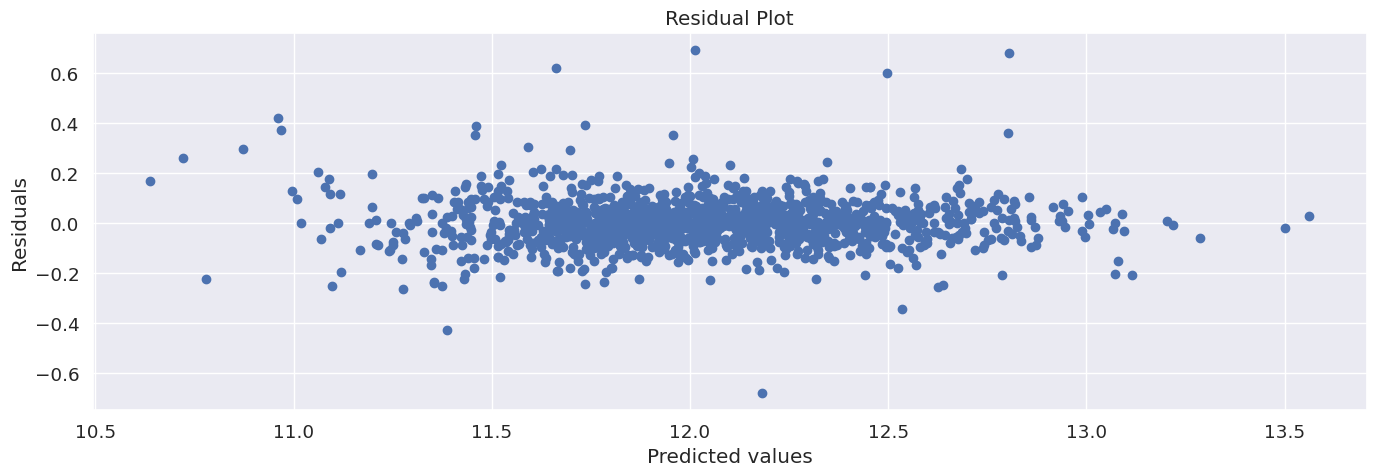

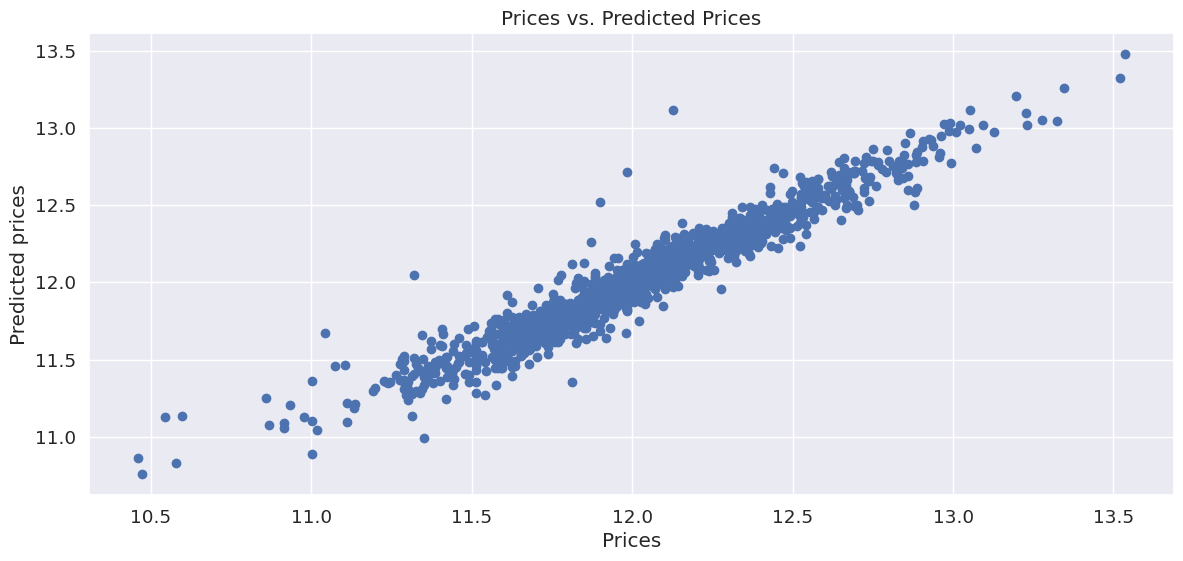

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


MSE for Linear Regression is : 0.0007
RMSE for Linear Regression is : 0.11781


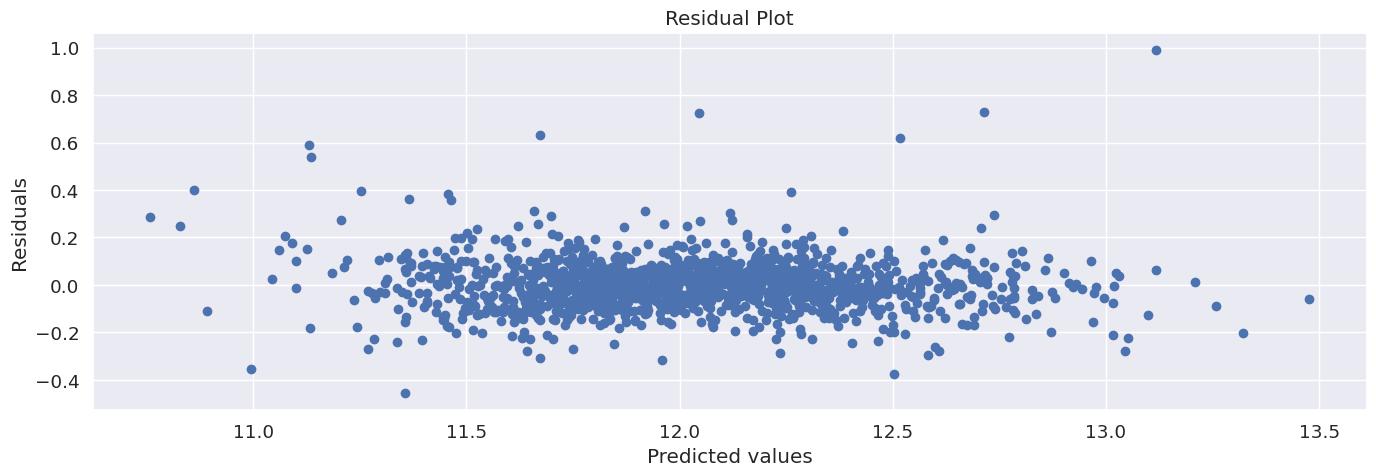

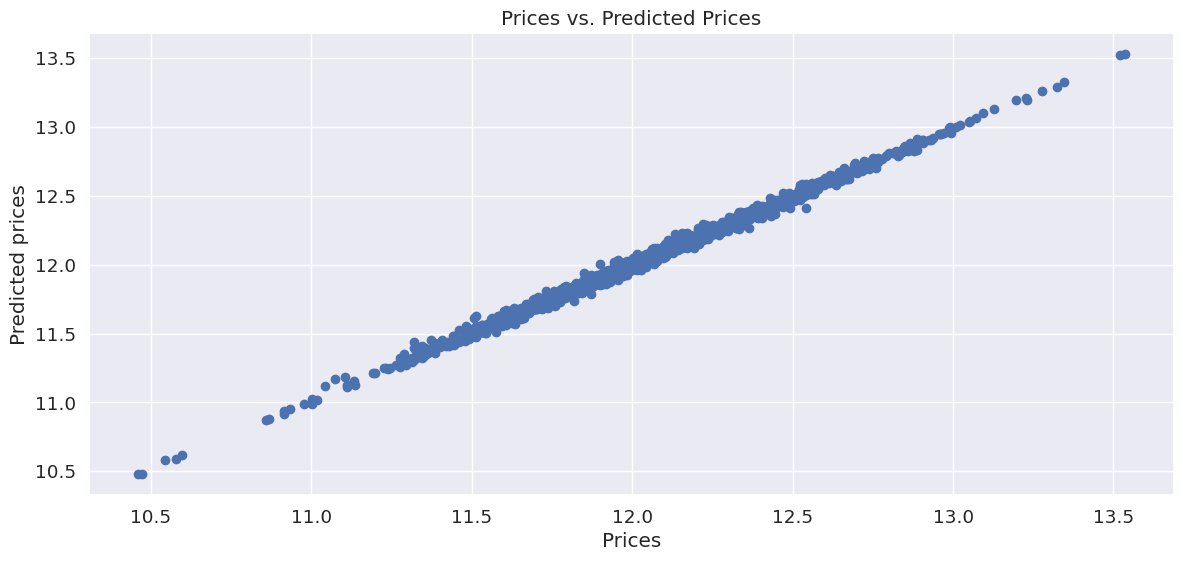

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 12.9min finished


MSE for Linear Regression is : 0.00087
RMSE for Linear Regression is : 0.11721


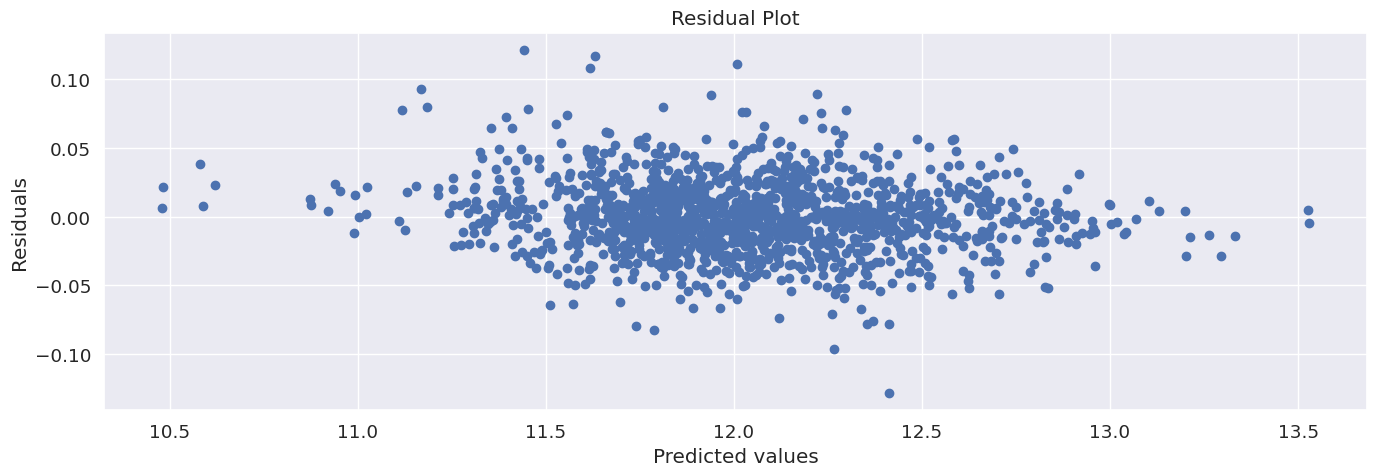

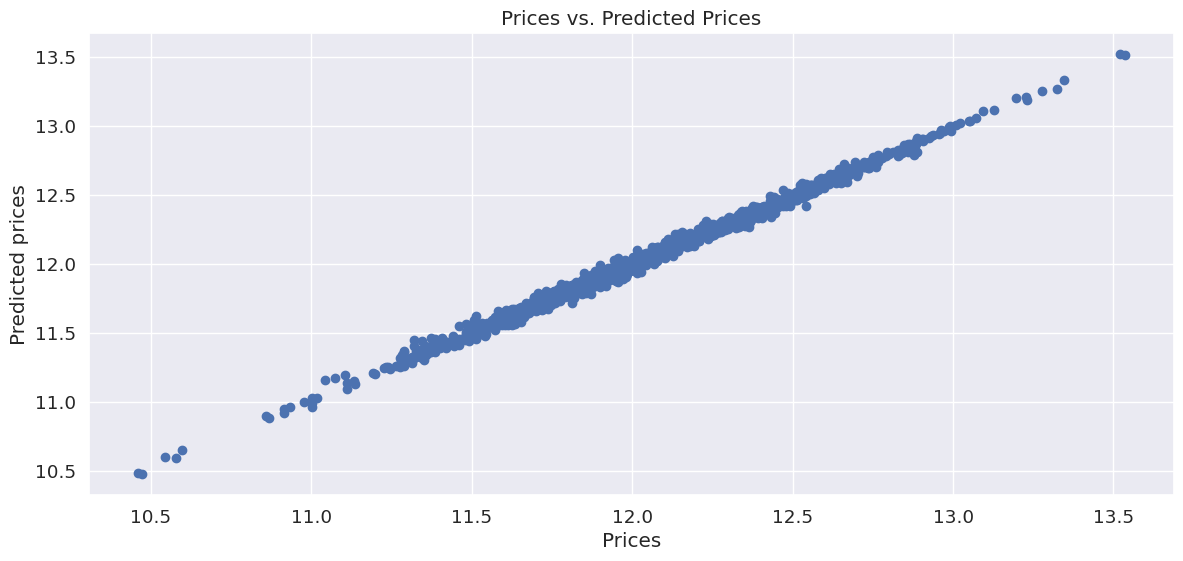

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished


MSE for Linear Regression is : 0.00087
RMSE for Linear Regression is : 0.13445


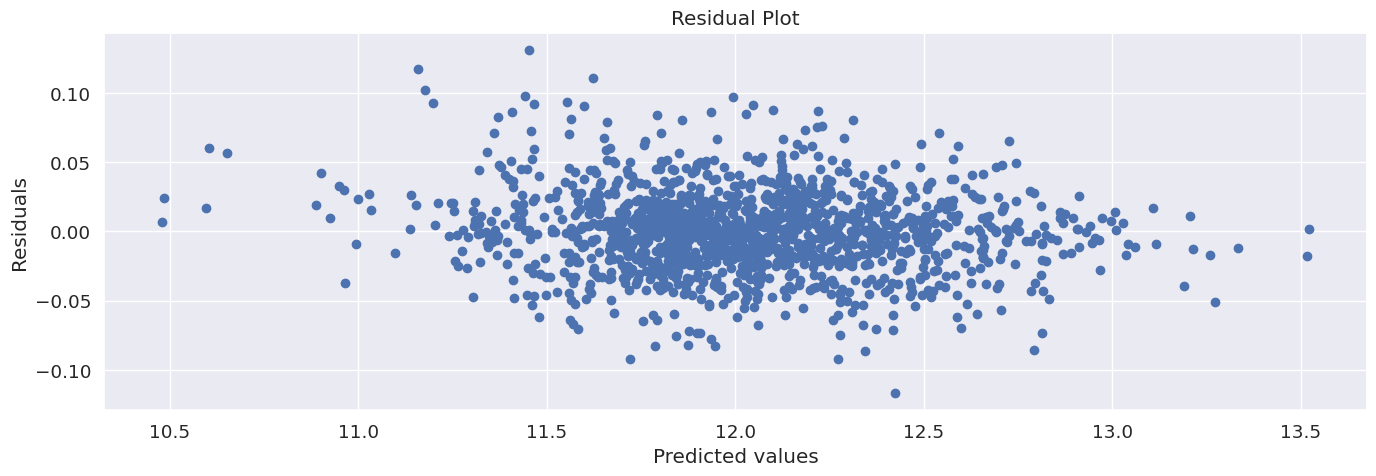

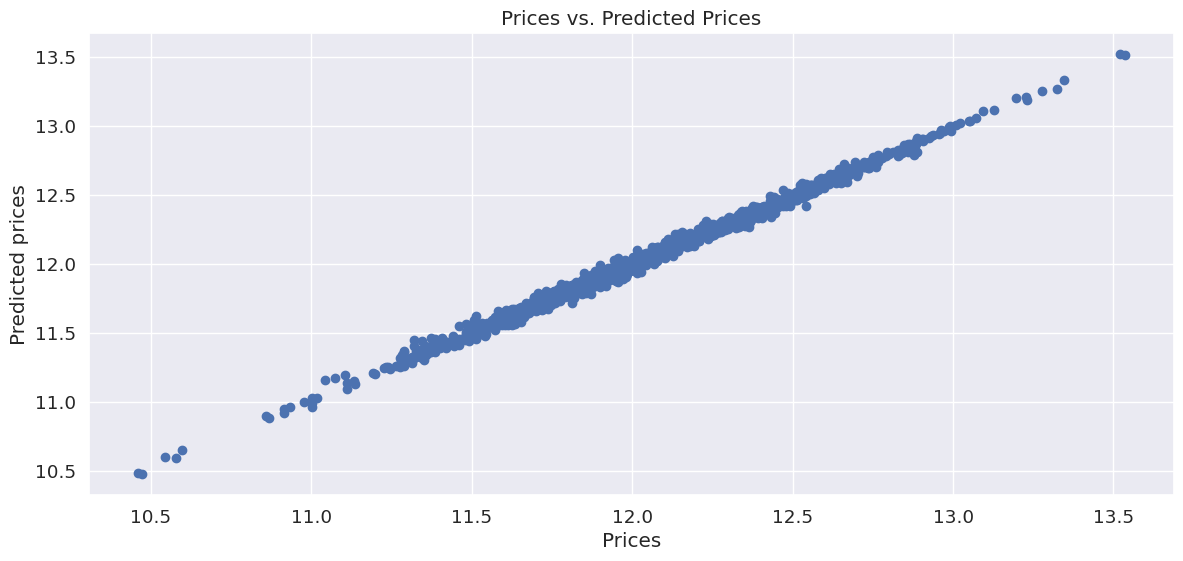

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2, colsa

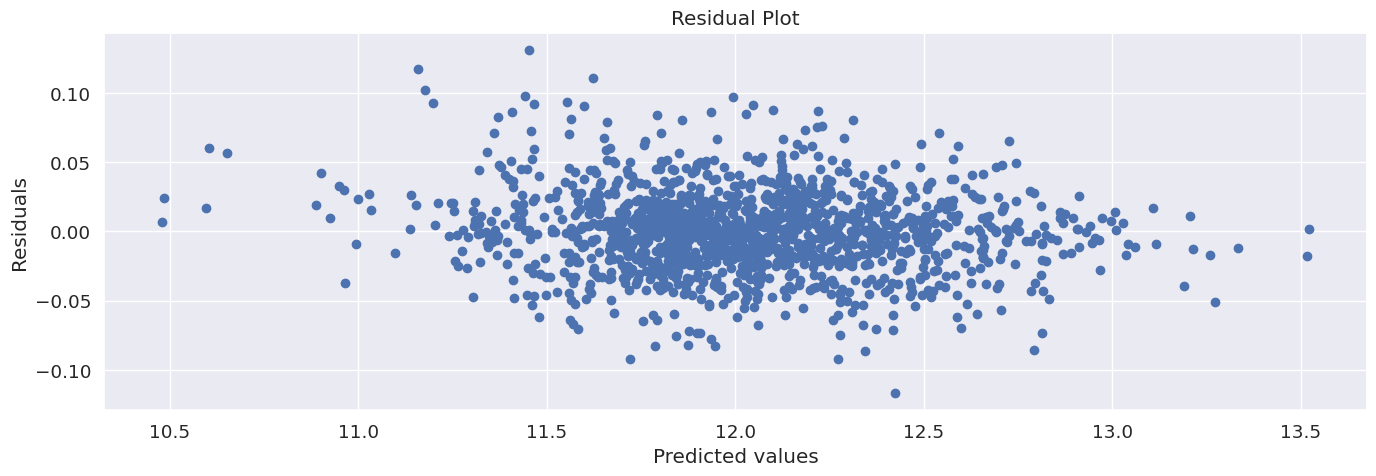

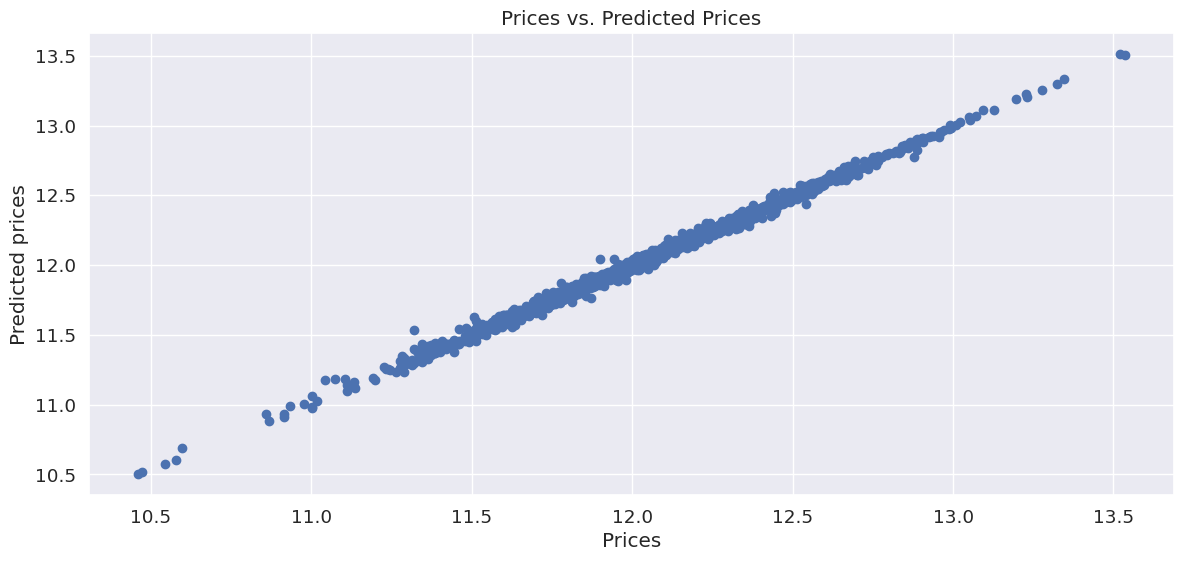

[14:06:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:57] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:08:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.23, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23
[LightGBM] [Warning] 

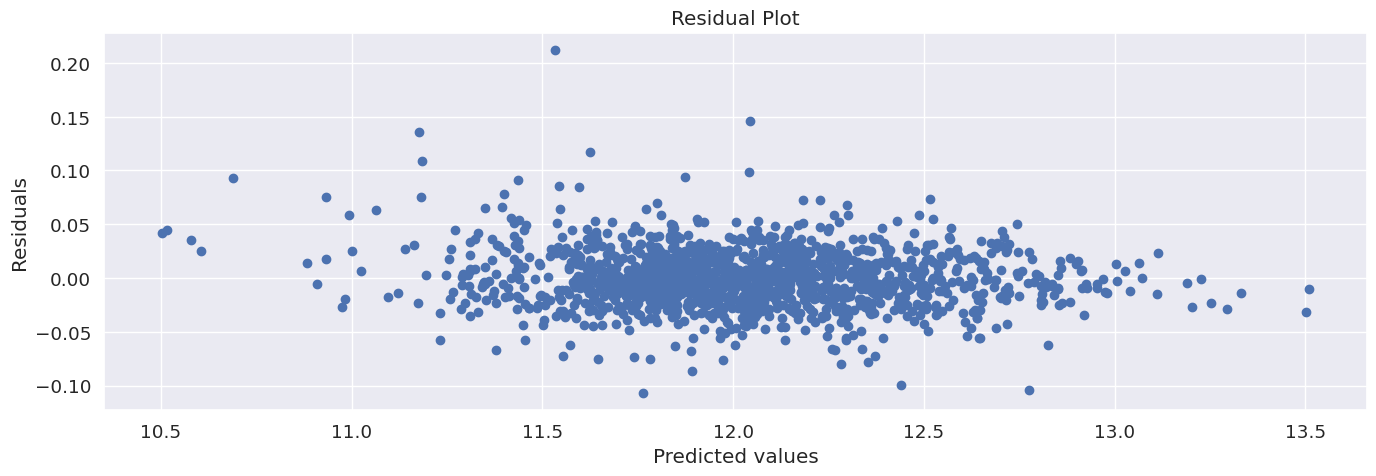

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Visualization
import seaborn as sns
import sklearn_pandas

# Encoding
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, Normalizer, StandardScaler, OneHotEncoder

# Models
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.linear_model import ElasticNet, Lasso, ElasticNetCV,LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
import lightgbm as lgb

# metrics
from sklearn.metrics import mean_squared_error,accuracy_score

# Warning
import warnings
warnings.filterwarnings('ignore')
train = pd.read_csv('/content/train.csv')
test =pd.read_csv('/content/test.csv')
data = pd.concat([train,test])
data.head()
print(train.shape,test.shape,data.shape)
train.SalePrice.describe()
plt.figure(figsize=(14,5))
sns.boxplot(data = train,x='SalePrice')
plt.tight_layout()
plt.figure(figsize=(14,5))
sns.set_style('darkgrid')
sns.histplot(data= train,x='SalePrice',bins=50,kde=True)
plt.title("Density plot of SalePrice Before Log Transformation")
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()
train.SalePrice.skew()
train['SalePrice'] = np.log1p(train['SalePrice'])
plt.figure(figsize=(14,5))
sns.histplot(train['SalePrice'],kde=True,bins= 50)
plt.title("Density plot of SalePrice after Log Transformation")
plt.tight_layout()
plt.show()
col = train.isna().sum()
col_na = pd.DataFrame({'Column': col.index,'Count':col.values}).sort_values(by='Count',ascending=False)
col_na.head(20)
sns.set(font_scale=1.2)
plt.figure(figsize=(14,5))
sns.barplot(data=col_na.head(20),x='Column',y='Count')
plt.xticks(rotation=50)
plt.tight_layout()
col_na['Percent_nan'] = (col_na['Count']/train.shape[0])*100
col_na
plt.figure(figsize=(14,5))
sns.set(font_scale=1.2)
sns.barplot(data=col_na.head(20),x='Column',y='Percent_nan')
plt.xticks(rotation=50)
plt.tight_layout()
train = train.drop(columns='Id')
test = test.drop(columns='Id')
print(train['Street'].value_counts())
print(train['Utilities'].value_counts())
train = train.drop(columns=['Street','Utilities'])
test = test.drop(columns= ['Street','Utilities'])
plt.figure(figsize=(14, 5))
sns.set(font_scale=1.2)
sns.scatterplot(data= data, y='SalePrice',x='GrLivArea')
plt.title("GrLivArea vs SalePrice")
plt.tight_layout()
plt.show()
clear_data = data.drop(data[(data['GrLivArea']>4500)].index)
train_ = clear_data.drop(['SalePrice'], axis=1)
all_data = pd.concat([train, test]).reset_index(drop=True)
all_data[all_data['GarageYrBlt']>2017]['GarageYrBlt']
all_data.loc[2592,'GarageYrBlt'] = 2007
plt.figure(figsize=(14,5))
sns.scatterplot(data = all_data,x='LotFrontage',y='SalePrice')
plt.title("LotFrontage vs SalePrice")
plt.tight_layout()
plt.show()
def convert_to_string(df, columns):
    df[columns] = df[columns].astype(str)
    return df


num_to_categ_features = ['MSSubClass', 'OverallCond']
all_data = convert_to_string(all_data, columns = num_to_categ_features)
# define 3 variables for replacing missing values
num_features = all_data.select_dtypes(include=['int64','float64']).columns
num_features_to_constant = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"]
num_features_to_median = [feature for feature in num_features if feature not in num_features_to_constant + ["SalePrice"]]
# Generating numerical features as input to DataFrameMapper.
numeric_features_median = sklearn_pandas.gen_features(columns=[num_features_to_median],
                                               classes=[{'class': SimpleImputer,
                                                         'strategy': 'median',
                                                         'missing_values' : np.nan}])

numeric_features_zero = sklearn_pandas.gen_features(columns=[num_features_to_constant],
                                               classes=[{'class': SimpleImputer,
                                                         'strategy': 'constant',
                                                         'fill_value' : 0,
                                                         'missing_values' : np.nan}])

missing_val_imputer = sklearn_pandas.DataFrameMapper(numeric_features_median + numeric_features_zero)
# Fitting
imputed_median = missing_val_imputer.fit(all_data)

# Transformation
imputed_features = imputed_median.transform(all_data)

# Putting into dataframe
imputed_df = pd.DataFrame(imputed_features, index=all_data.index, columns=num_features_to_median + num_features_to_constant)
imputed_df.head()
none_conversion = [("MasVnrType","None"),
                  ("BsmtQual","NA"),
                  ("Electrical", "SBrkr"),
                  ("BsmtCond","TA"),
                  ("BsmtExposure","No"),
                  ("BsmtFinType1","No"),
                  ("BsmtFinType2","No"),
                  ("CentralAir","N"),
                  ("Condition1","Norm"),
                  ("Condition2","Norm"),
                  ("ExterCond","TA"),
                  ("ExterQual","TA"),
                  ("FireplaceQu","NA"),
                  ("Functional","Typ"),
                  ("GarageType","No"),
                  ("GarageFinish","No"),
                  ("GarageQual","NA"),
                  ("GarageCond","NA"),
                  ("HeatingQC","TA"),
                  ("KitchenQual","TA"),
                  ("Functional","Typ"),
                  ("GarageType","No"),
                  ("GarageFinish","No"),
                  ("GarageQual","No"),
                  ("GarageCond","No"),
                  ("HeatingQC","TA"),
                  ("KitchenQual","TA"),
                  ("MSZoning", "None"),
                  ("Exterior1st", "VinylSd"),
                  ("Exterior2nd", "VinylSd"),
                  ("SaleType", "WD")]
def none_transform(df, conversion_list):
    ''' Function that converts missing categorical values
    into specific strings according to "conversion_list"

    Returns the dataframe after transformation.
    '''
    for col, new_str in conversion_list:
        df.loc[:, col] = df.loc[:, col].fillna(new_str)
    return df
# Applying the "none_transform" function
all_data = none_transform(all_data, none_conversion)
len(all_data.columns)
# collecting the numeric features without considering SalePrice
numeric_features = [feat for feat in num_features if feat not in ['SalePrice']]
# selecting columns with skew more than 0.5
skewed_features = all_data[num_features].apply(lambda x: x.dropna().skew())
skewed_features = skewed_features[skewed_features > 0.5].index
print("\nHighly skewed features: \n\n{}".format(skewed_features.tolist()))
# Applying log-transformation
all_data[skewed_features] = np.log1p(all_data[skewed_features])
test[skewed_features] = np.log1p(test[skewed_features])
class OrderedLabelTransformer(BaseEstimator, TransformerMixin):
    orderDict = {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}

    @staticmethod
    def get_dict(X):
        FirstDict = {"Po" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}
        SecondDict = {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
        ThirdDict = {"NA" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}
        for d in [FirstDict, SecondDict, ThirdDict]:
            if set(X) == set(d):
                return d

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def get_label(t):
            return self.orderDict[t]
        return np.array([get_label(n) for n in X])
class NeighborhoodTransformer(BaseEstimator, TransformerMixin):
    neighborhoodsmap = {'StoneBr' : 2, 'NridgHt' : 2, 'NoRidge': 2,
                        'MeadowV' : 0, 'IDOTRR' : 0, 'BrDale' : 0 ,
                        'CollgCr': 1, 'Veenker' : 1, 'Crawfor' : 1,
                        'Mitchel' : 1, 'Somerst' : 1, 'NWAmes' : 1,
                        'OldTown' : 1, 'BrkSide' : 1, 'Sawyer' : 1,
                        'NAmes' : 1, 'SawyerW' : 1, 'Edwards' : 1,
                        'Timber' : 1, 'Gilbert' : 1, 'ClearCr' : 1,
                        'NPkVill' : 1, 'Blmngtn' : 1, 'SWISU' : 1,
                        'Blueste': 1}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def get_label(t):
            return self.neighborhoodsmap[t]
        return np.array([get_label(n) for [n] in X])
# Generating features:
order_feats = ["ExterQual", "ExterCond", "HeatingQC", "KitchenQual", "BsmtQual","BsmtCond", "FireplaceQu", "GarageQual", "GarageCond"]

original_features_df = all_data[order_feats + ['Neighborhood']] # we need to save original values for one-hot encoding

order_features = sklearn_pandas.gen_features(order_feats, [OrderedLabelTransformer])
neighb_features = [(['Neighborhood'], [NeighborhoodTransformer()])]
# Pipeline
label_encoder = sklearn_pandas.DataFrameMapper(neighb_features + order_features)
# The list with order of column names
cols = ["Neighborhood"] + order_feats

# Transformation both train and test set
transformed_feats = label_encoder.fit_transform(all_data)

# Putting transformed features into dataframe
transformed_df = pd.DataFrame(transformed_feats, index=all_data.index, columns=cols)
original_features_df.shape
# feature without any transformation till now
rest_features = set(pd.concat([imputed_df, original_features_df],axis=1).columns).symmetric_difference(set(all_data.columns))
rest_features_df = all_data[list(rest_features)]
all_data = pd.concat([imputed_df, original_features_df, rest_features_df],axis=1)
all_data.shape
# Total Squere Feet for house
all_data["TotalSqrtFeet"] = all_data["GrLivArea"] + all_data["TotalBsmtSF"]
test["TotalSqrtFeet"] = test["GrLivArea"] + test["TotalBsmtSF"]

# Total number of bathrooms
all_data["TotalBaths"] = all_data["BsmtFullBath"] + (all_data["BsmtHalfBath"]  * .5) + all_data["FullBath"] + (all_data["HalfBath"]* .5)
test["TotalBaths"] = test["BsmtFullBath"] + (test["BsmtHalfBath"]  * .5) + test["FullBath"] + (test["HalfBath"]* .5)
# If the house has a garage
all_data['Isgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# If the house has a fireplace
all_data['Isfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# If the house has a pool
all_data['Ispool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# If the house has second floor
all_data['Issecondfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# If the house has Open Porch
all_data['IsOpenPorch'] = all_data['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

# If the house has Wood Deck
all_data['IsWoodDeck'] = all_data['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
y_train = train['SalePrice']
all_data = all_data.drop(["SalePrice"], axis = 1)

hot_one_features = pd.get_dummies(all_data).reset_index(drop=True)
hot_one_features.shape
all_data = pd.concat([transformed_df, hot_one_features],axis=1)
train_preprocessed = all_data.iloc[:len(train),:]
test_preprocessed = all_data.iloc[len(train_preprocessed):,:]
print(len(test_preprocessed) == len(test))
X_train = train_preprocessed
X_test = test_preprocessed
def rmse(model):
    n_folds=5
    kfold = KFold(n_folds, random_state=42, shuffle=True).get_n_splits(X_train)
    rmse_score = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = "neg_mean_squared_error", cv = kfold, verbose = -1, n_jobs=-1))
    return(np.mean(rmse_score))
X_train.shape,y_train.shape,X_test.shape
lr_model = make_pipeline(RobustScaler(), LinearRegression())
lr_model.fit(X_train,y_train)
y_train_pred = lr_model.predict(X_train)
mse_train = round(mean_squared_error(y_train_pred,y_train),5)
rmse_lr = round(rmse(lr_model),5)
print('MSE for Linear Regression is :',mse_train)
print('RMSE for Linear Regression is :',rmse_lr)
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")
plt.show()
plt.figure(figsize=(14,5))
plt.scatter(y_train_pred,y_train_pred - y_train)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.tight_layout()
ls_model = make_pipeline(RobustScaler(),LassoCV(alphas=[0.0005],random_state=0,cv=10))
ls_model.fit(X_train,y_train)
y_train_pred = ls_model.predict(X_train)
mse_train = round(mean_squared_error(y_train_pred,y_train),5)
rmse_lasso = round(rmse(ls_model),5)
print('MSE for Linear Regression is :',mse_train)
print('RMSE for Linear Regression is :',rmse_lasso)
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")
plt.show()
plt.figure(figsize=(14,5))
plt.scatter(y_train_pred,y_train_pred - y_train)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.tight_layout()
gbr = GradientBoostingRegressor(random_state=0)
param_grid = {'n_estimators': [3400],
              'max_features': [13],
              'max_depth': [5],
              'learning_rate': [0.01],
              'subsample': [0.8],
             'random_state' : [5]}
gb_model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=5)
gb_model.fit(X_train, y_train)
y_train_pred = gb_model.predict(X_train)
mse_train = round(mean_squared_error(y_train_pred,y_train),5)
rmse_gb = round(rmse(gb_model),5)
print('MSE for Linear Regression is :',mse_train)
print('RMSE for Linear Regression is :',rmse_gb)
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")
plt.show()
plt.figure(figsize=(14,5))
plt.scatter(y_train_pred,y_train_pred - y_train)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.tight_layout()
xgbreg = xgb.XGBRegressor(seed=0)
param_grid2 = {'n_estimators': [2500],
              'learning_rate': [0.03],
              'max_depth': [3],
              'subsample': [0.8],
              'colsample_bytree': [0.45]}

xgb_model = GridSearchCV(estimator=xgbreg, param_grid=param_grid2, n_jobs=1, cv=10)
xgb_model.fit(X_train, y_train)
y_train_pred = xgb_model.predict(X_train)
mse_train = round(mean_squared_error(y_train_pred,y_train),5)
rmse_xgb = round(rmse(xgb_model),5)
print('MSE for Linear Regression is :',mse_train)
print('RMSE for Linear Regression is :',rmse_xgb)
# Prediction Plot
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")
plt.show()
# Residual plot
plt.figure(figsize=(14,5))
plt.scatter(y_train_pred,y_train_pred - y_train)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.tight_layout()
en_model = ElasticNetCV(alphas = [0.0005],
                        l1_ratio = [.9],
                        random_state = 0,
                        cv=10)
en_model.fit(X_train,y_train)
y_train_pred = xgb_model.predict(X_train)
mse_train = round(mean_squared_error(y_train_pred,y_train),5)
rmse_en = round(rmse(en_model),5)
print('MSE for Linear Regression is :',mse_train)
print('RMSE for Linear Regression is :',rmse_en)
# Prediction Plot
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")
plt.show()
# Residual plot
plt.figure(figsize=(14,5))
plt.scatter(y_train_pred,y_train_pred - y_train)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.tight_layout()
lgb_model = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.05, n_estimators=4000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb_model.fit(X_train,y_train)
y_train_pred = lgb_model.predict(X_train)
mse_train = round(mean_squared_error(y_train_pred,y_train),5)
rmse_lgb = round(np.sqrt(mean_squared_error(y_train_pred,y_train)),5)
print('MSE for Linear Regression is :',mse_train)
print('RMSE for Linear Regression is :',rmse_lgb)
# Prediction Plot
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")
plt.show()
# Residual plot
plt.figure(figsize=(14,5))
plt.scatter(y_train_pred,y_train_pred - y_train)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.tight_layout()
from mlxtend.regressor import StackingCVRegressor
lasso_model = make_pipeline(RobustScaler(),
                            LassoCV(max_iter= 10000000, alphas = [0.0005],random_state = 42, cv=5))

elasticnet_model = make_pipeline(RobustScaler(),
                                 ElasticNetCV(max_iter=10000000, alphas=[0.0005], cv=5, l1_ratio=0.9))

lgbm_model = make_pipeline(RobustScaler(),
                           lgb.LGBMRegressor(objective='regression',num_leaves=5,
                                             learning_rate=0.05, n_estimators=4000,
                                             max_bin = 55, bagging_fraction = 0.8,
                                             bagging_freq = 5, feature_fraction = 0.23,
                                             feature_fraction_seed = 9, bagging_seed=9,
                                             min_data_in_leaf = 6,
                                             min_sum_hessian_in_leaf = 11))

xgboost_model = make_pipeline(RobustScaler(),
                              xgb.XGBRegressor(learning_rate = 0.01, n_estimators=3400,
                                               max_depth=3,min_child_weight=0 ,
                                               gamma=0, subsample=0.7,colsample_bytree=0.7,
                                               objective= 'reg:linear',nthread=4,
                                               scale_pos_weight=1,seed=27, reg_alpha=0.00006))

stack_regressor = StackingCVRegressor(regressors=(lasso_model, elasticnet_model, xgboost_model, lgbm_model),
                                      meta_regressor=xgboost_model, use_features_in_secondary=True)
stack_model = stack_regressor.fit(np.array(X_train),  np.array(y_train))
stack_gen_pred = stack_model.predict(X_test)
lgbm_pred = lgb_model.predict(X_test)
lasso_pred = ls_model.predict(X_test)
en_pred = en_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
error = pd.DataFrame({'Models': ['Linear Regression','Lasso Model','Gradient Boosting Regressor','XGB Regressor','Elastic Net','Light GBM'],
                     'RMSE':[rmse_lr,rmse_lasso,rmse_gb,rmse_xgb,rmse_en,rmse_lgb]})
error.sort_values(by='RMSE',ascending =False)
stack_preds = ((0.1*xgb_pred) + (0.075*gb_pred) + (0.4*lgbm_pred) + (0.4*stack_gen_pred) +(0.025*en_pred) )
stack_preds
final_pred = np.expm1(stack_preds)
sub = pd.read_csv('/content/sample_submission.csv')
sub['SalePrice'] = final_pred
sub.head()
sub.to_csv('submission.csv',index= False)